In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(768, 9)

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0 = non-diabetic

1 = diabetic

In [6]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
X = diabetes_data.drop('Outcome', axis=1)
Y = diabetes_data['Outcome']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [13]:
classifier = svm.SVC(kernel='linear')

In [14]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
#Accuacy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'Accuracy Score of the training data: {training_data_accuracy * 100:.2f}%')

Accuracy Score of the training data: 78.34%


In [28]:
#Accuracy score on the test data
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)
print(f'Accuracy Score of the test data: {test_data_accuracy * 100:.2f}%')

Accuracy Score of the test data: 77.27%


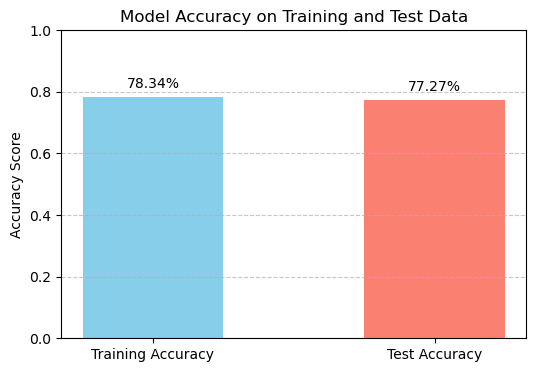

In [32]:
import matplotlib.pyplot as plt

# Accuracy scores
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)

# Labels and values
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [training_data_accuracy, test_data_accuracy]

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, accuracies, color=['skyblue', 'salmon'], width=0.5)
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy on Training and Test Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02,
             f'{height * 100:.2f}%', ha='center', va='bottom')

plt.show()


**Making a Predictive System**

In [49]:
input_data = (1,103,30,38,83,43.3,0.183,33)

#changing the input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("This person is Non-diabetic")
else:
    print("This person is Diabetic")   

[0]
This person is Non-diabetic


C:\Users\ritam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Saving the training model**

In [21]:
import pickle

In [22]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [23]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [24]:
input_data = (1,103,30,38,83,43.3,0.183,33)

#changing the input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("This person is Non-diabetic")
else:
    print("This person is Diabetic")   

[0]
This person is Non-diabetic


C:\Users\ritam\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
